In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os
from itertools import chain
import numpy as np
import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import export_text, plot_tree
from xgboost import XGBRegressor


In [3]:
lines = ["b", "g", "r", "orange", "purple"]
colors1 = sns.color_palette("hls", 8)
colors2 = sns.color_palette("husl", 8)
markers = ["*", "s", "^", "o"]

In [6]:
def plot_exp(exp_names, exps, title, metric, baseline=True):
    for i, (exp, exp_path) in enumerate(zip(exp_names, exps)):
        with open(exp_path, "r") as f:
            results = json.load(f)        
        plt.plot(range(1, len(results[metric])+1), results[metric], color=colors2[i], linestyle="-", marker=markers[i], label=f"{exp}")
    if baseline:
        plt.plot(range(1, len(results[metric])+1), [83.01 for _ in range(len(results[metric]))], color="black", linestyle=":", label="Supervised")    
    plt.xlabel("Generation")
    plt.ylabel("Test Accuracy")
    plt.xticks=(range(len(results[metric])))
    plt.legend(bbox_to_anchor=(1.5, 1.02))
    plt.suptitle(title)
    plt.show() 
    plt.clf()

def plot_exp_on_ax(exp_names, exps, title, metric, ax):
    for i, (exp, exp_path) in enumerate(zip(exp_names, exps)):
        with open(exp_path, "r") as f:
            results = json.load(f)        
        ax.plot(range(1, len(results[metric])+1), results[metric], color=colors2[i], linestyle="-", marker=markers[i], label=f"{exp}")

    ax.plot(range(1, len(results[metric])+1), [83.01 for _ in range(len(results[metric]))], color="black", linestyle=":", label="Supervised")    
    ax.xticks=(range(len(results[metric])))
    ax.set_title(title)

def get_data_from_dir(exp_dir):
    # get op, int format data from exp_dir
    exps = glob.glob(os.path.join(exp_dir, "*/"))
    chromos = []
    for e in exps:
        seed = e.split("/")[-2]
        with open(os.path.join(e, "outcomes.json"), "r") as f:
            results = json.load(f)
            for fitness, chromo in zip(results["pop_vals"], results["chromos"]):
                c = list(chain.from_iterable(chromo[1]))
                c.append(seed)
                c.append(fitness[1])
                chromos.append(c)
    columns = list(chain.from_iterable([[f"aug{i}", f"op{i}"] for i in range(1, 4)]))
    columns.append("seed")
    columns.append("test acc")
    columns
    df = pd.DataFrame(chromos, columns=columns)
    
    # create data in long format
    ops = set(list(df["aug1"]) + list(df["aug2"]) +  list(df["aug3"]))
    indexes = {op:i for i, op in enumerate(ops)}
    chromos_long = np.zeros([len(chromos), len(ops)+2])
    for i, c in enumerate(chromos):
        for aug, intensity in zip(c[:-2][::2], c[:-2][1::2]):
            chromos_long[i][indexes[aug]] = intensity
            chromos_long[i][-2] = int(c[-2])
            chromos_long[i][-1] = c[-1]
    columns_long = list(ops) + ["seed", "fitness"]
    df_long = pd.DataFrame(chromos_long, columns = columns_long)
    return df, df_long, ops

def get_data(exp_path):
    chromos = []
    with open(exp_path, "r") as f:
        results = json.load(f)
        for fitness, chromo in zip(results["pop_vals"], results["chromos"]):
            c = list(chain.from_iterable(chromo[1]))
            c.append(fitness[1])
            chromos.append(c)
    columns = list(chain.from_iterable([[f"aug{i}", f"op{i}"] for i in range(1, 4)]))
    columns.append("test acc")
    columns
    df = pd.DataFrame(chromos, columns=columns)
    
    # create data in long format
    ops = set(list(df["aug1"]) + list(df["aug2"]) +  list(df["aug3"]))
    indexes = {op:i for i, op in enumerate(ops)}
    chromos_long = np.zeros([len(chromos), len(ops)+1])
    for i, c in enumerate(chromos):
        for aug, intensity in zip(c[:-2][::2], c[:-2][1::2]):
            chromos_long[i][indexes[aug]] = intensity
            chromos_long[i][-1] = c[-1]
    columns_long = list(ops) + ["fitness"]
    df_long = pd.DataFrame(chromos_long, columns = columns_long)
    return df, df_long, ops

# Optimization Final Results 

In [4]:
# EXP 8 #

b256 = [
    "/home/noah/ESSL/final_exps/optimization/exp8_0/1/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp8_1/0/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp8_2/1/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp8_3/0/outcomes.json"
]

b256_names = ["SwaV", "BYOL", "SimSiam", "NNCLR"]

b32 = [
    "/home/noah/ESSL/final_exps/optimization/exp6_1/6/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp6_2/8/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp6_3/3/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp6_0/3/outcomes.json"
]

b32_names = ["SwaV", "BYOL", "SimSiam", "NNCLR"]


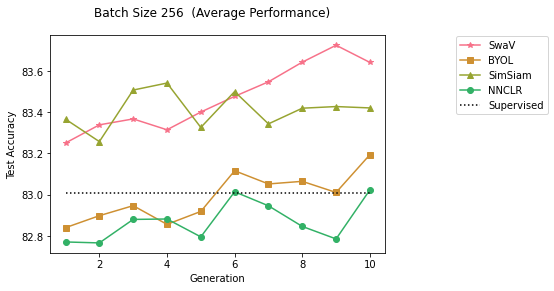

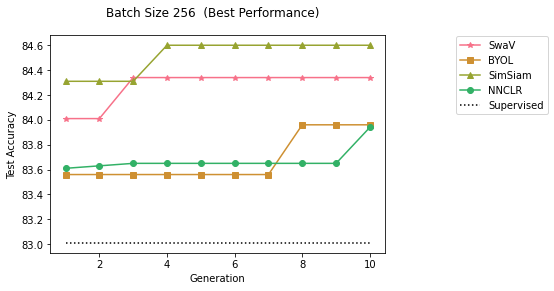

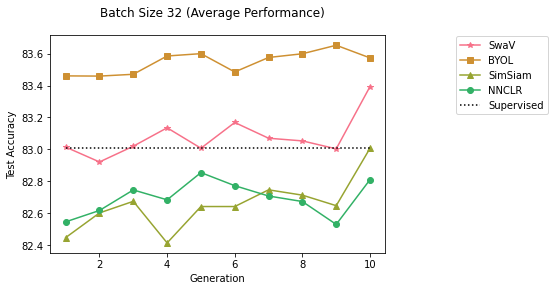

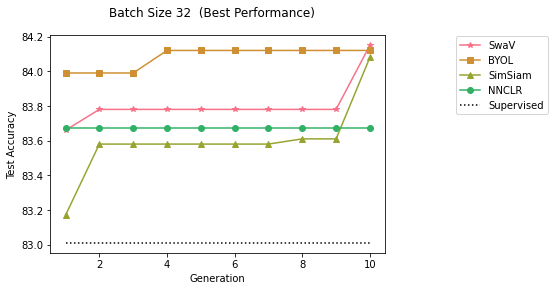

<Figure size 432x288 with 0 Axes>

In [5]:
# plot all four experiments
plot_exp(exp_names=b256_names, exps=b256, title="Batch Size 256  (Average Performance)", metric="avg")
plot_exp(exp_names=b256_names, exps=b256, title="Batch Size 256  (Best Performance)", metric="max")
plot_exp(exp_names=b32_names, exps=b32, title="Batch Size 32 (Average Performance)", metric="avg")
plot_exp(exp_names=b32_names, exps=b32, title="Batch Size 32  (Best Performance)", metric="max")

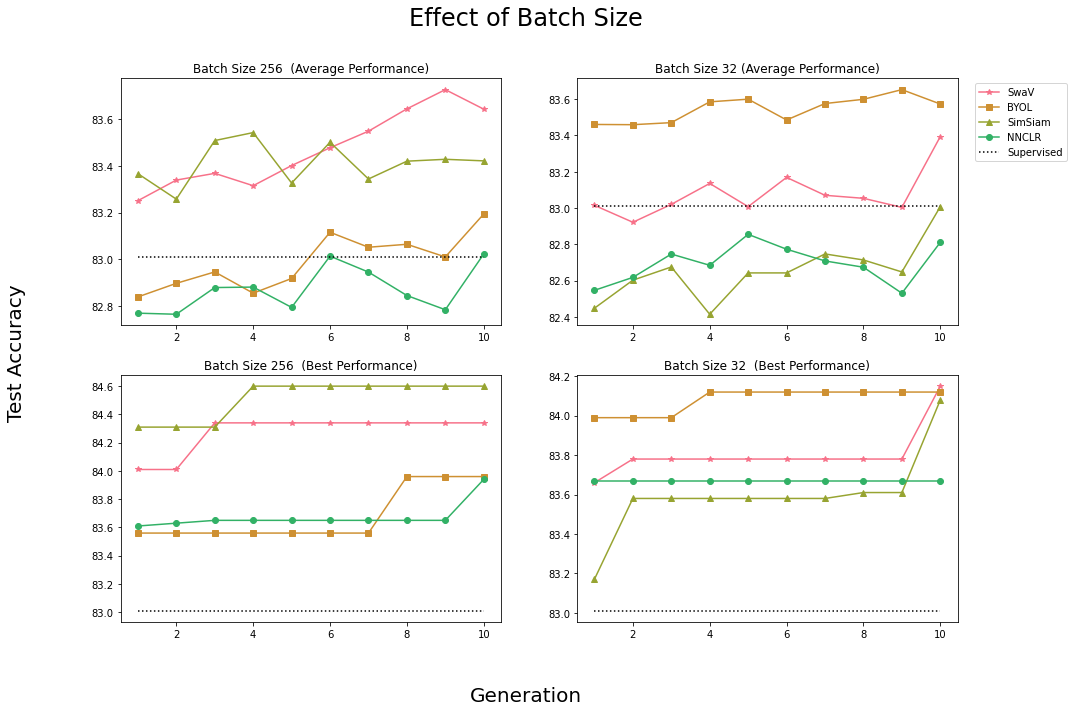

In [6]:

# plot 2x2 of figures
fig, ax = plt.subplots(2,2, figsize=(15, 10))
plot_exp_on_ax(exp_names=b256_names, exps=b256, title="Batch Size 256  (Average Performance)", metric="avg", ax=ax[0,0])
plot_exp_on_ax(exp_names=b256_names, exps=b256, title="Batch Size 256  (Best Performance)", metric="max", ax=ax[1,0])
plot_exp_on_ax(exp_names=b32_names, exps=b32, title="Batch Size 32 (Average Performance)", metric="avg", ax=ax[0,1])
plot_exp_on_ax(exp_names=b32_names, exps=b32, title="Batch Size 32  (Best Performance)", metric="max", ax=ax[1,1])
plt.legend(bbox_to_anchor=(1.3, 2.2))
fig.supxlabel("Generation", fontsize=20)
fig.supylabel("Test Accuracy", fontsize=20)
fig.suptitle("Effect of Batch Size", fontsize=24)

plt.show()

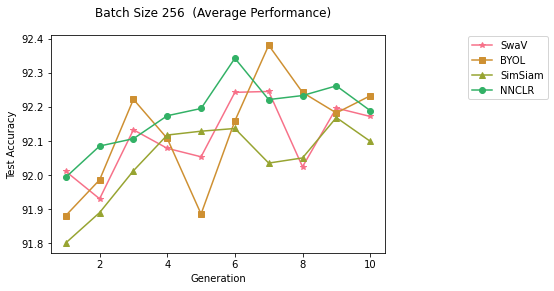

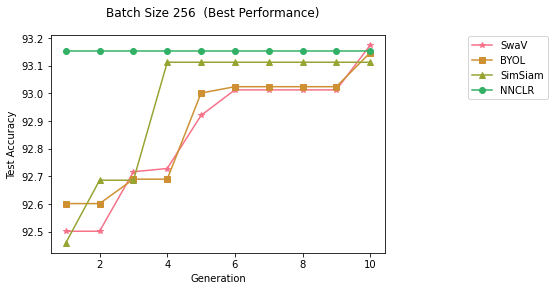

<Figure size 432x288 with 0 Axes>

In [7]:
# EXP 8 #

b256 = [
    "/home/noah/ESSL/final_exps/optimization/exp10_0/1/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp10_1/4/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp10_2/1/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp10_3/1/outcomes.json"
]

b256_names = ["SwaV", "BYOL", "SimSiam", "NNCLR"]


# plot all four experiments
plot_exp(exp_names=b256_names, exps=b256, title="Batch Size 256  (Average Performance)", metric="avg", baseline=False)
plot_exp(exp_names=b256_names, exps=b256, title="Batch Size 256  (Best Performance)", metric="max", baseline=False)


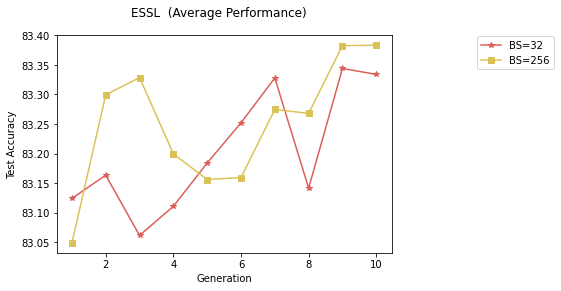

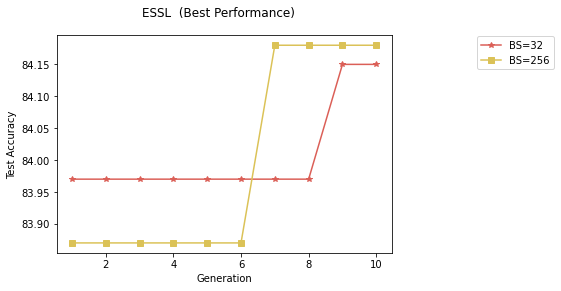

<Figure size 432x288 with 0 Axes>

In [4]:
essl_exps = ['/home/noah/ESSL/final_exps/essl/exp7/4/outcomes.json',
             '/home/noah/ESSL/final_exps/essl/exp6/4/outcomes.json']
essl_names = ["BS=32", "BS=256"]

plot_exp(exp_names=essl_names, exps=essl_exps, title="ESSL  (Average Performance)", metric="avg", baseline=False)
plot_exp(exp_names=essl_names, exps=essl_exps, title="ESSL  (Best Performance)", metric="max", baseline=False)

# Regression Analysis

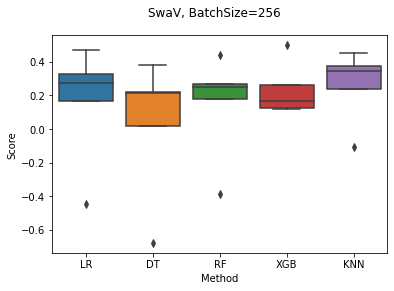

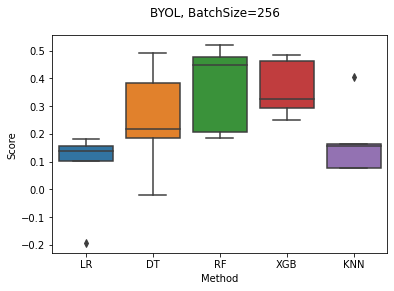

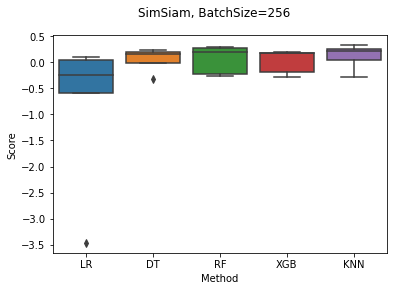

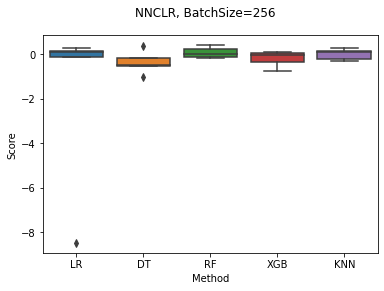

<Figure size 432x288 with 0 Axes>

In [7]:
# bsize 256
for exp_path, exp_name in zip(b256, b256_names):
    df, df_long, ops = get_data(exp_path)

    X = df_long[ops]
    y = df_long["fitness"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
    LR = LinearRegression()
    lr_scores = cross_val_score(LR, X, y, cv=5)
    DT = DecisionTreeRegressor(random_state=0)
    dt_scores = cross_val_score(DT, X, y, cv=5)
    RF = RandomForestRegressor()
    rf_scores = cross_val_score(RF, X, y, cv=5)
    XGB = XGBRegressor()
    xgb_scores = cross_val_score(XGB, X, y, cv=5)
    KNN = KNeighborsRegressor()
    knn_scores = cross_val_score(KNN, X, y, cv=5)
    long_format = []
    long_format+=[["LR", s] for s in lr_scores]
    long_format+=[["DT", s] for s in dt_scores]
    long_format+=[["RF", s] for s in rf_scores]
    long_format+=[["XGB", s] for s in xgb_scores]
    long_format+=[["KNN", s] for s in knn_scores]

    df = pd.DataFrame(long_format, columns=["Method", "Score"])
    sns.boxplot(data=df, x="Method", y="Score")
    plt.suptitle(f"{exp_name}, BatchSize=256")
    plt.show()
    plt.clf()

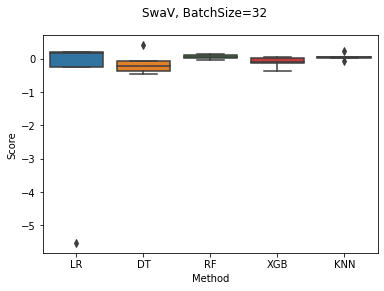

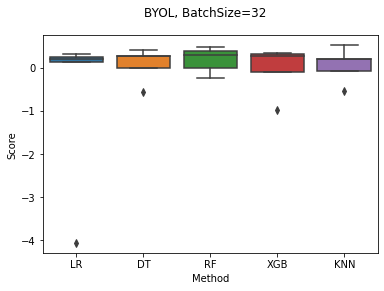

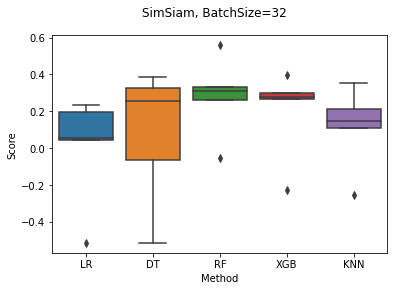

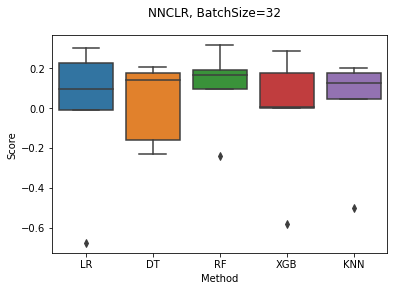

<Figure size 432x288 with 0 Axes>

In [8]:
# bsize 32
for exp_path, exp_name in zip(b32, b32_names):
    df, df_long, ops = get_data(exp_path)

    X = df_long[ops]
    y = df_long["fitness"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
    LR = LinearRegression()
    lr_scores = cross_val_score(LR, X, y, cv=5)
    DT = DecisionTreeRegressor(random_state=0)
    dt_scores = cross_val_score(DT, X, y, cv=5)
    RF = RandomForestRegressor()
    rf_scores = cross_val_score(RF, X, y, cv=5)
    XGB = XGBRegressor()
    xgb_scores = cross_val_score(XGB, X, y, cv=5)
    KNN = KNeighborsRegressor()
    knn_scores = cross_val_score(KNN, X, y, cv=5)
    long_format = []
    long_format+=[["LR", s] for s in lr_scores]
    long_format+=[["DT", s] for s in dt_scores]
    long_format+=[["RF", s] for s in rf_scores]
    long_format+=[["XGB", s] for s in xgb_scores]
    long_format+=[["KNN", s] for s in knn_scores]

    df = pd.DataFrame(long_format, columns=["Method", "Score"])
    sns.boxplot(data=df, x="Method", y="Score")
    plt.suptitle(f"{exp_name}, BatchSize=32")
    plt.show()
    plt.clf()

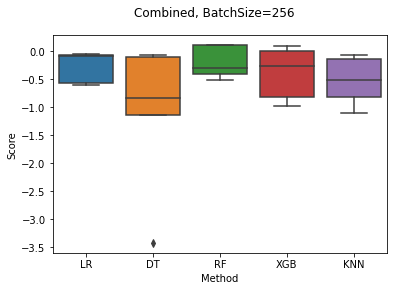

<Figure size 432x288 with 0 Axes>

In [9]:
# combine all 4 experiments
total = []
for exp_path, exp_name in zip(b256, b256_names):
    df, df_long, ops = get_data(exp_path)
    total.append(df_long)
df_long = pd.concat(total)
df_long


X = df_long[ops]
y = df_long["fitness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
LR = LinearRegression()
lr_scores = cross_val_score(LR, X, y, cv=5)
DT = DecisionTreeRegressor(random_state=0)
dt_scores = cross_val_score(DT, X, y, cv=5)
RF = RandomForestRegressor()
rf_scores = cross_val_score(RF, X, y, cv=5)
XGB = XGBRegressor()
xgb_scores = cross_val_score(XGB, X, y, cv=5)
KNN = KNeighborsRegressor()
knn_scores = cross_val_score(KNN, X, y, cv=5)
long_format = []
long_format+=[["LR", s] for s in lr_scores]
long_format+=[["DT", s] for s in dt_scores]
long_format+=[["RF", s] for s in rf_scores]
long_format+=[["XGB", s] for s in xgb_scores]
long_format+=[["KNN", s] for s in knn_scores]

df = pd.DataFrame(long_format, columns=["Method", "Score"])
sns.boxplot(data=df, x="Method", y="Score")
plt.suptitle(f"Combined, BatchSize=256")
plt.show()
plt.clf()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 663, in fit
    X, y, accept_sparse=accept_sparse, y_numeric=True, multi_output=True
  File "/home/noah/.conda/envs/essl/lib/python3.7/site-packages/sklearn/base.py", line 581, in _valid

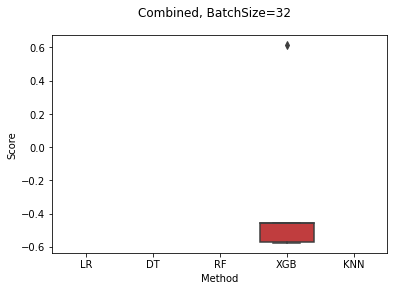

<Figure size 432x288 with 0 Axes>

In [10]:
# combine all 4 experiments
total = []
for exp_path, exp_name in zip(b32, b32_names):
    df, df_long, ops = get_data(exp_path)
    total.append(df_long)
df_long = pd.concat(total)
df_long


X = df_long[ops]
y = df_long["fitness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
LR = LinearRegression()
lr_scores = cross_val_score(LR, X, y, cv=5)
DT = DecisionTreeRegressor(random_state=0)
dt_scores = cross_val_score(DT, X, y, cv=5)
RF = RandomForestRegressor()
rf_scores = cross_val_score(RF, X, y, cv=5)
XGB = XGBRegressor()
xgb_scores = cross_val_score(XGB, X, y, cv=5)
KNN = KNeighborsRegressor()
knn_scores = cross_val_score(KNN, X, y, cv=5)
long_format = []
long_format+=[["LR", s] for s in lr_scores]
long_format+=[["DT", s] for s in dt_scores]
long_format+=[["RF", s] for s in rf_scores]
long_format+=[["XGB", s] for s in xgb_scores]
long_format+=[["KNN", s] for s in knn_scores]

df = pd.DataFrame(long_format, columns=["Method", "Score"])
sns.boxplot(data=df, x="Method", y="Score")
plt.suptitle(f"Combined, BatchSize=32")
plt.show()
plt.clf()